<img src="./Topol/digital fellowships_rf.png" width="100%" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://alandavies.netlify.com" target="_blank">Dr Alan Davies</a></div>
            <div style="text-align: right">Lecturer health data science</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="https://github.com/i3hsInnovation/resources/blob/efa61022d0b8893200dad308f6590e694291f8c7/images/alan.PNG?raw=true" width="30%" />
         </td>
     </tr>
</table>

# Decision Trees and Random Forests 
****

#### About this Notebook
This notebook introduces a Machine Learning algorithm called Random Forests which is built in turn on Decision Trees. We will apply these algorithms to some real world data introduced in another notebook Working with Data.  Random forests use the ‘wisdom of crowds’ to make their prediction, so for example, when you gather lots of the opinions in a crowd many individual ones will often be wrong but collectively the correct viewpoint usually becomes apparent.

This notebook is at <code>Beginner</code> level. 

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
    
- Investigate key features of Random Forest machine learning algorithms 

- Explore some essential Machine Learning Python libraries to implement Machine Learning algorithms

</div> 

<a id="top"></a>

<b>Table of contents</b><br/>

1.0 [Decision Trees](#decisiontrees)

2.0 [Random Forests](#randomforests)

3.0 [Classification](#classification)

4.0 [Interpreting the Results](#Interpretingresults)

5.0 [Feature Importance](#Featureimportance)

6.0 [Your Turn](#yourturn)

7.0 [Further Reading](#furtherreading)

----------


<a id="decisiontrees"></a>

## Decision Trees

<code>Decision tree</code> algorithms were first introduced decades ago. Modern variants use these trees as the basis for more powerful techniques such as <code>random forests</code>, which are some of today's most powerful methods. It can be difficult to understand how some Machine Learning algorithms arrive at their conclusions. This has led to many of these algorithms being described as <a href="https://towardsdatascience.com/the-black-box-metaphor-in-machine-learning-4e57a3a1d2b0" target="_blank" >Black boxes</a>. One of the advantages of using decision trees and methods based on them is that they are much easier to explain and understand. 

A statistician called <strong>Leo Breiman</strong> from the University of California coined the term <code>CART</code>, which stands for <code>classification and regression trees</code>.  These  algorithms  are  capable  of  carrying out both <code>regression</code> and <code>classification</code> tasks. Leo worked at the intersection between Computer Science and Statistics and promoted real world problem solving over theoretical concerns. Sadly he did not live to see how wide spread the use of this algorithms would become. 

<div class="alert alert-success">
<strong>Note:</strong>
If you are interested, there is a paper <a href="https://projecteuclid.org/euclid.ss/1009213726" target="_blank">here</a> where Leo contrasts the two cultures of data modeling (stochastic data models and algorithmic models).
</div>

The first thing to note is that unlike a conventional tree that grows upwards, these trees tend to be represented from the top down or sideways. For example:

<img src="./Topol/tree1.png" align="left" />

The anatomy of a tree can be seen below. This details the names of the main nodes and sections of a typical tree structure. The tree represents the criteria for making choices and shows how logical choices can be made based on following these individual criteria until we reach a final conclusion (decision).

<div class="alert alert-success">
<strong>Note:</strong>
<ul>
    <li><strong>Classification:</strong> Predicting which <i>class</i> (discrete label) a data point belongs to.</li>
    <li><strong>Regression:</strong> Predicting a <i>quantity</i> (continuous value).</li>
</ul>
<br />
For more information, see <a href="https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/" target="_blank">Difference Between Classification and Regression in Machine Learning</a>
</div>

<img src="./Topol/nodes.png" align="left" />

The first example above shows a decision tree that could be used to determine to lend money to someone (or not) based on their income and rental expenses.The first node (Income < 25K) is termed the <code>root node</code> representing the entire sample that is further subdivided. Sub-nodes that are further divided are called <code>decision nodes</code>. Nodes with proceeding nodes are also called <code>parent nodes</code> with subsequent nodes referred to as <code>child nodes</code>. If a node has no child nodes it is termed a <code>leaf</code> or <code>terminal</code> node. And finally a sub-section of a tree is called a <code>branch</code> or <code>sub-tree</code>. Below is what an actual tree generated with a Python Machine Learning library looks like:

<img src="./Topol/tree.png" align="left" />

 The splitting of data is performed via <code>recursive greedy binary splitting</code>. This means a repeated action is used to split data into 2 parts. The greedy element refers to the way the best decision is made at the current step, rather than considering future splits that might lead to an overall better tree. This is achieved by comparing every feature and value until the best split can be achieved. The way this is done is dependent on if you are using the algorithm for regression or classification.

<div class="alert alert-success">
<strong>Note:</strong>
    For <strong>regression</strong> the <code>mean square error (MSE)</code> or <code>sum of squared errors (SSE)</code> are typically used to find the optimal split. <br><br>
    $$ MSE = \frac{1}{n} \displaystyle\sum_{i-1}^{n}(Y_i - \hat{Y}_i)^2 $$
    <br>In the case of <strong>classification</strong> the <code>class error rate</code>, <code>cross entropy</code> or most commonly the <code>Gini index/impurity</code> is used. If the index is 0 then all the cases belong to a specific target category:
    $$ Gini_{i} = \displaystyle\sum_{k=1}^{K} \hat{p}_{mk}(1 - \hat{p}_{mk}) $$
<br><br>
    Although helpful, it is not necessary to understand the underlying mathematics in order to use the Machine Learning libraries in Python.
</div>

Trees are useful when data is <code>linearly inseparable</code>. Consider the image below. The image on the left shows that the data can be easily separated with a line to divide the stars and triangles, which in this example represent 2 different classes of something (e.g. cats and dogs). This ability to separate data with a line means it is <code>linearly separable</code>. You can see however that this won't work with the image on the right. We can't separate our data with a single line. This means that the data on the right is <code>linearly inseparable</code>. Decision trees can deal with this type of data.

<img src="./Topol/sep.png" align="center" />

[Return to top](#top)


----------


<a id="randomforests"></a>

## Random Forests

Although the decision tree is easy to explain and interpret, it lacks predictive power and can create complicated trees that fit the data well but do not generalize well to new data (called <code>overfitting</code>). Small variations in the data (<code>variance</code>) can lead to very different trees being created. One way to improve this is to use multiple trees. This is essentially what a Random Forest is. This is known as an <code>ensemble</code> method, where many weak learners can combine to create a more powerful one.

The <code>sklearn</code> library has some datasets that are built in. We will use one of these datasets to apply a Random Forest in Python for the purposes of classifying data.  

First let's import the Breast cancer dataset from the <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> and the <code>pandas</code> module as it it useful for data science and supports objects like <code>data frames</code> that can display our data in tables.

<div class="alert alert-block alert-info">
<b>Task 1:</b>
<br> 
Have a look at the link to the data presented in the link above. <br>
    1. What information is presented about the data?<br>
    2. What information does the dataset capture?
</div>

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

Here we load the dataset into a variable called <code>cancer</code>. The other lines of code make sure that we have the correct column names. Finally on the last line, we store the data in a dataframe object called <code>df</code> (short for data frame) to make it easier to manipulate in a tabular form.

In [3]:
cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

Now we can view the <code>head</code> of the data to see what the data looks like. In this case the first 25 records. Note the <code>target</code> column at the far right of the data table output below. 

<div class="alert alert-danger">
<strong>Note:</strong>
    A value of <code>0</code> means <strong>benign</strong> (not cancer), whereas a value of <code>1</code> means it is <strong>malignant</strong> (cancer). 
</div>

In [4]:
df.head(25)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0.0


[Return to top](#top)


----------


<a id="classification"></a>

## Classification

We might want to train a classifier so that when we provide it with new data (say from new patients), it can determine if this new data should be classified as being either cancer or no-cancer. To do this we will split our data into a <code>training</code> and <code>test</code> set. We can use the training data to train our model and then see how well it performs against the previously unseen test data. Remember that a model is only an approximation (abstraction) of a real world situation.

<img src="./Topol/model.png" width="60%" align="center" />

The first step involves separating the <code>features</code> (column names) from the <code>label</code> (in this case <strong>target</strong>). We can do this to all the data before we do any splitting of the data. You will recall from the previous notebook that to do this we can use the integer location indexing from pandas to get all the columns apart from the last one (0 to -1). We will store the features in a variable called <code>X</code> and the labels in a variable called <code>y</code> as is conventional.  

In [5]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

We can now import a function called <code>train_test_split</code> that has been specially designed to help us do this data splitting as it is a common step in Machine Learning. We will have training and testing sets for <code>X</code> and for <code>y</code>. Here we specify the size of the test set as <strong>25%</strong> of the data.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

We now have a training and test split for features <code>X</code> (<code>X_train</code>, <code>X_test</code>) and for the labels <code>y</code> (<code>y_train</code>, <code>y_test</code>).

<div class="alert alert-success">
<strong>Note:</strong>
    This function converts the data into a <code>numpy.ndarray</code> (a multidimensional, homogeneous array of fixed-size items). This format works well with the various Machine Learning algorithms, but this means that we can no longer use functions like <code>head()</code> to view the data as it is now not a dataframe any more. We could view such data with Python's <code>print()</code> function (e.g. <code>print(y_train)</code>).
</div>

We now need to import the <code>classifier</code> that we want to use. In this case, this the classifier for Random Forests which is called <code>RandomForestClassifier</code>.

In [7]:
from sklearn.ensemble import RandomForestClassifier

Now we can use the classifier. In this case I will call it <code>rf</code> for Random Forest. The <code>n_estimators</code> parameter is the <strong>number of trees</strong> that you will use in your 'forest'. 

In [8]:
rf = RandomForestClassifier(n_estimators=5000)

<div class="alert alert-success">
<strong>Note:</strong> We can add other parameters to our classifier. For example we can change the cost function used. So to use the Gini index described previously, we could write <code>RandomForestClassifier(n_estimators=5000, criterion="gini")</code> or change <code>gini</code> to <code>entropy</code>. The Gini index is used by default so we don't specify this explicitly. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">Here</a> are more details of the possible parameters you can use.
</div>

To <code>train</code> our data we use the <code>fit()</code> function, passing in the training features and training labels. More specifically the fit function adjusts weights in accordance with data values to achieve better accuracy.

In [9]:
rf.fit(X_train, y_train);

<div class="alert alert-block alert-info">
<b>Task 2:</b>
<br> 
Write the line of code above again in the cell below. This time do not add the colon (;) at the end of the line. This will output all of the functions default parameters.
</div>

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Next we can use the <code>predict()</code> function to predict the label for some new hitherto unseen data. For this we use our test data (<code>X_test</code>). The predicted values are then stored in a variable called <code>y_pred</code>.

In [11]:
y_pred = rf.predict(X_test)

[Return to top](#top)


----------


<a id="Interpretingresults"></a>


## Interpreting the results

Once a model has been produced, we then need to evaluate how effective it is. There are several approaches we can take. This can include looking at a range of metrics and using visualisations. The <code>sklearn</code> library has some useful functions for producing metrics for evaluating Machine Learning models.

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

### 4.1 Accuracy

One of the most common is the <code>accuracy</code>. This is used as a measure of performance and refers to the ratio of correctly predicted samples out of all available samples. This can be defined as follows:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

<div class="alert alert-danger">
<strong>Note:</strong>
    <ul>
        <li>TP = True Positive</li>
        <li>TN = True Negative</li>
        <li>FP = False Positive</li>
        <li>FN = False Negative</li>
    </ul>
</div>

To do this in Python we can use the <code>accuracy_score()</code> function like so:

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.951048951048951


We can round this up so we don't include so many numbers. For example to 3 decimal places.

In [14]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred), 3))

Accuracy: 0.951


<div class="alert alert-block alert-info">
<b>Task 3:</b>
<br> 
1. Convert the accuracy to a percentage.<br>
    2. Output the result with the <code>print()</code> function to 2 decimal places.
</div>

In [15]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",round(acc*100, 2),"%")

Accuracy: 95.1 %


### 4.2 Confusion matrix

Another way to visualise how well the model performs in terms of prediction is to view this in the form of a <code>confusion matrix</code>. This is a table that shows the predicted against the actual class. We can do this with the <code>confusion_matrix()</code> function.

In [16]:
print(confusion_matrix(y_test,y_pred))

[[53  2]
 [ 5 83]]


This provides the necessary data but it is difficult to interpret what it is showing us. We can use a plot to display this in a more intuative way. First we will store the data from the confusion matrix in a variable called <code>conf_mat</code>.

In [17]:
conf_mat = confusion_matrix(y_test,y_pred)

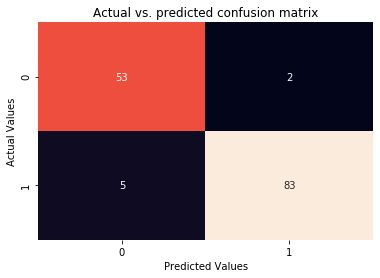

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. predicted confusion matrix')
plt.show()

It should be clearer now that we can see the true and false positives. We can also extract these values from the confusion matrix.

In [19]:
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TP = conf_mat[1][1]

print("True positive:",TP)
print("False positive:", FP)
print("False negative:", FN)
print("True negative:", TN)

True positive: 83
False positive: 2
False negative: 5
True negative: 53


<div class="alert alert-success">
    <strong>Note:</strong> Another way of achieving this is to use the <code>ravel()</code> function. e.g. <code>tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()</code>
</div>

<div class="alert alert-block alert-info">
<b>Task 4:</b>
<br> 
1. Given the variables above (TN, FP, FN and TP), manually compute and display the accuracy. Remember:<br>
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$
</div>

In [20]:
acc = (TP + TN) / (TP + TN + FP + FN)
print(acc)

0.951048951048951


### 4.3 Precision

Another useful metric is <code>Precision</code>. This shows us the percentage of positive classifications that were correct, or in other words, how precise were we. Precision is also sometimes called <code>positive predictive value</code>.<br>
$$\text{Precision} = \frac{TP}{TP + FP} $$

### 4.4 Recall

Also called <code>sensitivity</code> or <code>true positive rate</code>, shows the proportion of correct identifications over the total amount of relevant instances, or in other words, the proportion of actual positives identified correctly. These two metrics (precision and recall) are often juxtaposed, and the attempt to improve one often negatively impacts on the other.<br>
$$\text{Recall} = \frac{TP}{TP + FN} $$

### 4.5 F1-score

Is the harmonic mean (an average) of the precision and recall.<br>
$$F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$

<div class="alert alert-block alert-info">
<b>Task 5:</b>
<br> 
1. Manually calculate the F1 score. <br>
    <strong>Hint:</strong> you will first need to calculate the precision and recall.
</div>

In [21]:
prec = TP / (TP + FP)
rec = TP / (TP + FN)
F1 = 2 * (prec * rec) / (prec + rec)
print("F1 score:",round(F1,2))

F1 score: 0.96


This could be hard work so luckily there is a function that can be used to calculate these common metrics for us.

The <code>classification_report()</code> function can be used to output a table of useful metrics.

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        55
         1.0       0.98      0.94      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



<div class="alert alert-success">
    <strong>Note:</strong> The Support refers to the number of times a class occurs in the ground truth (the correct target values).
</div>

We can also extract the individual values like so:

In [23]:
precision, recall, fscore, support = score(y_test, y_pred, average='macro')
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', fscore)
print('Support:', support)

Precision: 0.945131845841785
Recall: 0.9534090909090909
F-score: 0.948795334799734
Support: None


### 4.6 Receiver operating characteristics (ROC) curve

Another way of visualising the trade off between the true and false positive rates is to view this with a ROC curve. The true positive rate (TPR) can be plotted against the false positive rate (FPR) using different threshold values. We can also compare
multiple models on the same plot to help chose the best one. Good
performance is indicated by a curve that hugs the left vertical and top horizontal
position of the graph (e.g. has the most area under the curve) shown in green on the image below. The plot shows the
trade-off between both the sensitivity and specificity of a model. The closer the
curve to the 45 degree dashed line, the worse the model's performance. The area
under the curve (AUC) is often used to quantify and compare different models.

<img src="./Topol/roc.png" width="40%" align="center" />

<strong>Source: </strong>Tharwat, (2018)

<div class="alert alert-success">
    <strong>Note:</strong> The TPR is also called <code>sensitivity</code> or <code>recall</code> as described above. <br>
  $$\text{TPR} = \frac{TP}{TP + FN} $$
    The FPR is determined by:<br>
    $$\text{FPR} = \frac{FP}{FP + TN} $$
</div>

To do this in Python we can use the <code>roc_curve</code> function from the <code>metrics</code> library. We cover how to do this in the notebook on Support Vector Machines.

[Return to top](#top)


----------


<a id="Featureimportance"></a>


## Feature Importance

We can also order the features in terms of their importance. This refers to their importance in terms of explaining the target variable, so in our case cancer or no-cancer. This works by calculating how much contributes each feature makes to decreasing the weighted impurity of the cost function we are using. To do this we use the <code>feature_importances_</code>. 

In [24]:
col_names = list(df.columns.values)
col_names = col_names[:-1]
feature_imp = pd.Series(rf.feature_importances_,index=col_names).sort_values(ascending=False)

We then import the required libraries for visualisation.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Finally we can output the features in terms of their importance in the form of a bar plot. We see here that the feature at the top is the most 'important' feature.

No handles with labels found to put in legend.


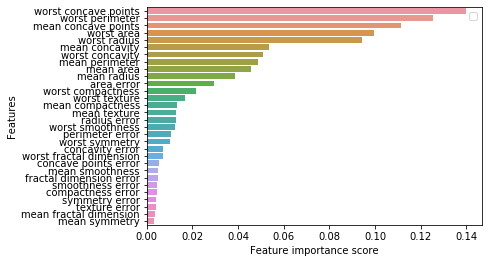

In [26]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.legend()
plt.show()

[Return to top](#top)


----------


<a id="yourturn"></a>


# Your Turn

Now let's try and apply what we have learned about Random Forests to a new dataset. This is the <code>pima-indians-diabetes</code> <a href="https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/data">dataset</a> from Kaggle that you saw previously. Click on the dataset link above and read the description of the data fields (columns) in the section called <code>About this file</code> so that you understand what sort of data is contained in the dataset.

Let's load the file and then display the first 10 records.

In [27]:
path='./Topol/pima-indians-diabetes.csv'
data = pd.read_csv(path)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


<div class="alert alert-block alert-info">
<b>Task 6:</b>
<br> 
    Split the data into features <code>X</code> and labels <code>y</code>.
</div>

In [28]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

<div class="alert alert-block alert-info">
<b>Task 7:</b>
<br> 
    Now split the data into <code>training</code> and <code>test</code> data for both features and labels.
</div>

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<div class="alert alert-block alert-info">
<b>Task 8:</b>
<br> 
    Create a <code>RandomForestClassifier</code> classifier with <code>5000</code> trees.
</div>

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5000, random_state=0)

<div class="alert alert-block alert-info">
<b>Task 9:</b>
<br> 
    Train the classifier with the <code>fit()</code> function.
</div>

In [31]:
rf.fit(X_train, y_train);

<div class="alert alert-block alert-info">
<b>Task 10:</b>
<br> 
    Make some predictions with your test data using the <code>predict()</code> function.
</div>

In [32]:
y_pred = rf.predict(X_test)

<div class="alert alert-block alert-info">
<b>Task 11:</b>
<br> 
1. Using the <code>classification_report()</code>, generate a report.<br>
2. Discuss the performance of your classifier with your colleagues. 
</div>

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       132
           1       0.65      0.57      0.61        60

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.76      0.77      0.77       192



<div class="alert alert-block alert-info">
<b>Task 12:</b>
<br> 
1. Create a plot for the importance of features.<br>
2. Discuss with your colleagues, is this what you expected?, why?
</div>

No handles with labels found to put in legend.


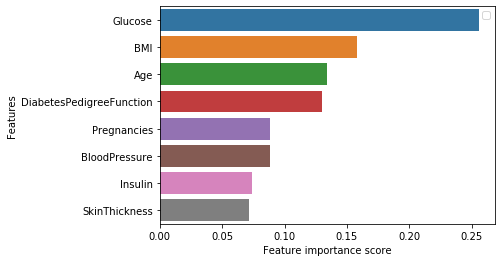

In [34]:
col_names = list(data.columns.values)
col_names = col_names[:-1]
feature_imp = pd.Series(rf.feature_importances_,index=col_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>Task 13:</b>
<br> 
1. Finally plot a confusion matrix and discuss the results. <br>
2. Did this perform as well on this dataset as it did on the cancer dataset?<br>
3. Why could this be the case?<br>
4. Can you modify any of your parameters (e.g. number of trees, percentage of data used for training) to improve performance?
</div>

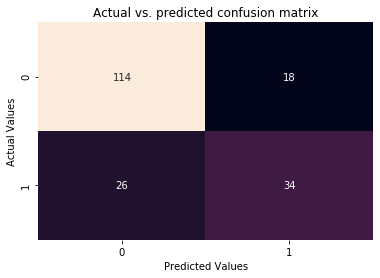

In [35]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. predicted confusion matrix')
plt.show()

[Return to top](#top)


----------


<a id="furtherreading"></a>


## Further Reading

Tharwat, A. (2018) <u><i>Classification assessment methods</u></i>. Applied Computing and Informatics, August 2018: https://doi.org/10.1016/j.aci.2018.08.003


------

#### Notebook details
<br>
<i>Notebook created by <strong>Dr. Alan Davies</strong> with, <strong>Frances Hooley</strong> and <strong>Dr. Jon Parkinson</strong>

Publish date: April 2020<br>
Review date: April 2021</i>

<strong>Note:</strong> This notebook features extracts from: <br>
<a href="https://link.springer.com/book/10.1007%2F978-3-030-47499-7#toc" target="_blank">Davies, A., Mueller, J. (2020) Developing Medical Apps and mHealth Interventions: A Guide for Researchers, Physicians and Informaticians. Springer: Switzerland</a>

Please give some feedback using the button below:

<a class="typeform-share button" href="https://hub11.typeform.com/to/qRicvM22" data-mode="popup" style="display:inline-block;text-decoration:none;background-color:#3A7685;color:white;cursor:pointer;font-family:Helvetica,Arial,sans-serif;font-size:18px;line-height:45px;text-align:center;margin:0;height:45px;padding:0px 30px;border-radius:22px;max-width:100%;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;font-weight:bold;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;" target="_blank">Rate this notebook </a> <script> (function() { var qs,js,q,s,d=document, gi=d.getElementById, ce=d.createElement, gt=d.getElementsByTagName, id="typef_orm_share", b="https://embed.typeform.com/"; if(!gi.call(d,id)){ js=ce.call(d,"script"); js.id=id; js.src=b+"embed.js"; q=gt.call(d,"script")[0]; q.parentNode.insertBefore(js,q) } })() </script>

## Notes: